## Deep Learning Project
#phase one

Mohammad kalbasi:401211028

Farbod Yadollahi: 98102595

AmirMasoud Bagheri:400203616

first we install requirements and import liibraries

In [2]:
pip install -U --no-cache-dir gdown --pre

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# first importing libraries
import base64
import requests
import numpy as np
import gdown
from zipfile import ZipFile
import gzip as gzip
import os

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import pandas as pd
from torchvision.io import read_image
import re
import cv2
from skimage.transform import resize
from google.colab.patches import cv2_imshow
from tqdm import tqdm
from torch.optim import lr_scheduler


from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

import time
import os
import copy

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [3]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git
import face_detection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-7t20pxwv
  Running command git clone --filter=blob:none --quiet https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-7t20pxwv
  Resolved https://github.com/hukkelas/DSFD-Pytorch-Inference.git to commit fc1051d80936e3d7a6e34053bb5485c0a032e42e
  Preparing metadata (setup.py) ... done
  Created wheel for face-detection: filename=face_detection-0.2.1-py3-none-any.whl size=29707 sha256=1c3096e0c349acc74e828b547c3a8a7e4bf42f5f687ee1cb2c1845fdf3a06759
  Stored in directory: /tmp/pip-ephem-wheel-cache-3mgylim3/wheels/57/d0/53/55657e0e64121cb64c10829c2f29bb3703afd0dcee55416e51
Successfully built face-detection


In [4]:
!git clone https://github.com/XL2248/MSCTD.git

Cloning into 'MSCTD'...
remote: Enumerating objects: 1217, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 1217 (delta 13), reused 7 (delta 3), pack-reused 1190
Receiving objects: 100% (1217/1217), 102.24 MiB | 24.27 MiB/s, done.
Resolving deltas: 100% (616/616), done.
Updating files: 100% (934/934), done.


In [6]:
from google.colab import drive
drive.mount('/content/gdrive') # we use google drive to load files and save models there! so change path files based on your own data and run the code!

Mounted at /content/gdrive


In [ ]:
!rm -r /content/gdrive/MyDrive/Phase_0_images

here we define a function to download the dataset from the drive

In [7]:
def donwload_to_file(grdive_path,file_name,output_path):
  """
  function for downloading zip files from google drive and save it to desired path on colab

  inputs:
    grdive_path: path of file we want to download (url should be in export=download format)
    file_name: name of file we want to download
    output_path:path we extract data into
  outputs:
    we dont have any output!

  """
  gdown.download(grdive_path, file_name)
  with ZipFile(file_name, 'r') as zipObj:
    # Extract all the contents of zip file in current directory
    zipObj.extractall(output_path)

here we download the dataset

In [ ]:
# for train          
donwload_to_file('https://drive.google.com/u/0/uc?id=1GAZgPpTUBSfhne-Tp0GDkvSHuq6EMMbj&export=download','train_ende.zip','/content/gdrive/MyDrive/Phase_0_images')
# renaming train folder name (it's train_ende) to just train so it is more consistent with other folders names
os.rename('/content/gdrive/MyDrive/Phase_0_images/train_ende','/content/gdrive/MyDrive/Phase_0_images/train')

# for validation     https://drive.google.com/u/0/uc?id=12HM8uVNjFg-HRZ15ADue4oLGFAYQwvTA&export=download
donwload_to_file('https://drive.google.com/u/0/uc?id=12HM8uVNjFg-HRZ15ADue4oLGFAYQwvTA&export=download','dev.zip','/content/gdrive/MyDrive/Phase_0_images')

# for test
donwload_to_file('https://drive.google.com/u/0/uc?id=1B9ZFmSTqfTMaqJ15nQDrRNLqBvo-B39W&export=download','test.zip','/content/gdrive/MyDrive/Phase_0_images')

Access denied with the following error:



 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/u/0/uc?id=12HM8uVNjFg-HRZ15ADue4oLGFAYQwvTA&export=download 



BadZipFile: ignored

In [ ]:
#test
gdown.download('https://drive.google.com/drive/folders/1-5vqUdiViXZ8D0Pt6oMIm5mgS36J0v7s?usp=sharing')

/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1-5vqUdiViXZ8D0Pt6oMIm5mgS36J0v7s?usp=sharing
To: /content/1-5vqUdiViXZ8D0Pt6oMIm5mgS36J0v7s?usp=sharing
959kB [00:00, 87.5MB/s]


'1-5vqUdiViXZ8D0Pt6oMIm5mgS36J0v7s?usp=sharing'

In [ ]:
#validation
!gdown 'https://drive.google.com/drive/folders/1Cp7aaOPJGOUCgE2974ivtepsHxiLpuyU?usp=sharing'

/usr/local/lib/python3.8/dist-packages/gdown/parse_url.py:35: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=None
  warnings.warn(
Downloading...
From: https://drive.google.com/drive/folders/1Cp7aaOPJGOUCgE2974ivtepsHxiLpuyU?usp=sharing
To: /content/1Cp7aaOPJGOUCgE2974ivtepsHxiLpuyU?usp=sharing
959kB [00:00, 82.1MB/s]


this is a dataset class to read the datasets' directory for images, texts and sentiments

In [8]:
class MSTCDDate(Dataset):
  """
  data loader class for getting data but one image (and it corresponding dialogue and label at a time)
  inputs:
    image_path: folder path of image data
    txt_path: folder path of txt data
    language: language type(english,german,...)
    mode: train,test,validation 
    image_format: jpg,png,...
    sclae: upscaling or downscaling image
    transform: transformation we want to apply on data
    target_transform: transformation we want to apply on labels



  """
   

  def __init__(self,image_path,txt_path,language,mode,image_format,scale, transform=None, target_transform=None):
     
      text_loader = language + '_' + mode + '.txt'
      sentiment_loader = 'sentiment_' + mode+'.txt'
      index_file = 'image_index_' + mode + '.txt'
      self.image_path = image_path
      self.transform = transform
      self.target_transform = target_transform
      self.mode = mode
      self.image_format = image_format
      self.scale = scale
      for file_names in os.scandir(txt_path):
        name_file = os.path.basename(file_names)
        if name_file == text_loader:
          with open(file_names.path) as f:
            self.text_file = [line.rstrip('\n') for line in f]
        if name_file == sentiment_loader:
          with open(file_names.path) as f:
            self.sentiment_file = [line.rstrip('\n') for line in f]
        if name_file == index_file:
          with open(file_names.path) as f:
            self.index_file = [line.rstrip('\n') for line in f]

  def __len__(self):
      return len(self.text_file)

  def __getitem__(self, idx):
      image_path_complete = self.image_path + '/' + self.mode + '/'
      text_file_chosen = self.text_file[idx]
      sentiment_chosen = int(self.sentiment_file[idx])
      temp_image = cv2.imread(image_path_complete+str(idx)+ '.' + self.image_format)
      n1,n2,n3 = np.shape(temp_image)
      if self.scale != 1:
        image = resize(temp_image,[int(n1/self.scale),int(n2/self.scale)], anti_aliasing=True)
      else:
        image = temp_image
      if self.transform:
          image = self.transform(image)
      if self.target_transform:
          label = self.target_transform(sentiment_chosen)
      return  text_file_chosen,sentiment_chosen,image

now we load the vgg image processing model from the previous part

In [9]:
model_vgg_trained =torchvision.models.vgg16(pretrained=True)
for param in model_vgg_trained.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
model_vgg_trained.classifier[6] = nn.Linear(4096, 3) # we have 3 output class
model_vgg_trained = model_vgg_trained.to(device)
if device == 'cpu':
  model_vgg_trained.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_1_models/vgg_trained/gdrivemodel_vgg_trained_weights.pth',map_location=torch.device('cpu')))
else:
  model_vgg_trained.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_1_models/vgg_trained/gdrivemodel_vgg_trained_weights.pth'))
model_vgg_trained.eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
print(model_vgg_trained)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

here we load the resnet model for face analysis part

In [11]:
model_resnet_trained= torchvision.models.resnet50(pretrained=True)

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_resnet_trained.fc.in_features
model_resnet_trained.fc = nn.Linear(num_ftrs, 3) # we have 10 output class

model_resnet_trained= model_resnet_trained.to(device)
if device == 'cpu':
  model_resnet_trained.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_1_models/resnet_trained',map_location=torch.device('cpu')))
else:
  model_resnet_trained.load_state_dict(torch.load('/content/gdrive/MyDrive/Phase_1_models/resnet_trained'))
model_resnet_trained.eval()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
print(model_resnet_trained)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

this is the mobilenet module for face detection

In [13]:
detector_mobilenet = face_detection.build_detector("RetinaNetMobileNetV1", confidence_threshold=.7, nms_iou_threshold=.3)

Downloading: "https://folk.ntnu.no/haakohu/RetinaFace_mobilenet025.pth" to /root/.cache/torch/hub/checkpoints/RetinaFace_mobilenet025.pth


  0%|          | 0.00/1.71M [00:00<?, ?B/s]

now we read the dataset with our MSCTD dataset class

In [ ]:
data_train = MSTCDDate('/content/gdrive/MyDrive/Phase_0_images','/content/MSCTD/MSCTD_data/ende','english','train','jpg',1)
text_file_chosen,sentiment_chosen,image = data_train[0] 

In [19]:
data_val = MSTCDDate('/content/gdrive/MyDrive/Phase_0_images/dev','/content/MSCTD/MSCTD_data/ende','english','dev','jpg',1)

In [14]:
data_test = MSTCDDate('/content/gdrive/MyDrive/Phase_0_images/test','/content/MSCTD/MSCTD_data/ende','english','test','jpg',1)

here are the transforms used for each previous parts

In [15]:
transformation_resnet= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,))])
transformation_vgg= transforms.Compose([transforms.ToTensor(),transforms.Resize((50,100)),transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

here we load the labels

In [54]:
with open('/content/MSCTD/MSCTD_data/ende/sentiment_train.txt') as f:
  sentiment_train = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_dev.txt') as f:
  sentiment_dev = [int(line.rstrip('\n')) for line in f]
with open('/content/MSCTD/MSCTD_data/ende/sentiment_test.txt') as f:
  sentiment_test = [int(line.rstrip('\n')) for line in f]

here we iterate through the images in train dataset in batch mode. for each batch, we first find the output of the image processing model-vgg 16. then we detect faces by the use of mobilenet module and pass first 6 detected faces to our face analysis module. number of detected faces followed by 6 faces analysis outputs and image processing output are concatenated into a vector of $1+6 \times 3 + 1 \times 3 = 22$ elements for each data to be used for our combine model which will be defined later.

In [ ]:
sentiment_list = []
inp=torch.zeros(len(data_train),7*3+1)
counter = 0
for i in tqdm(range(len(data_train)), total = len(data_train), desc="extracting faces... "):
  help=[]
  text_file_chosen,sentiment_chosen,image = data_train[i] # loading file
  imagep=image[:,:,[2,1,0]]
  image1=torch.unsqueeze(transformation_vgg(imagep),0)
  image1=image1.to(device)
  with torch.no_grad():
    image_out=model_vgg_trained(image1)
  #image2=torch.unsqueeze(transformation_resnet(image),0)
  #image2=image2.to(device)
  face_all = detector_mobilenet.detect(image)
  inp[i,0]=len(face_all)
  c=0
  for xmin,ymin,xmax,ymax,confidence in face_all:
    if c>=6:
      break;
    if xmin < 0 :
      xmin = 0
    if ymin < 0:
      ymin = 0
    sentiment_list.append(sentiment_chosen)
    temp = image[int(ymin): int(ymax),int(xmin):int(xmax),:]
    temp = resize(temp,[int(100),int(75)], anti_aliasing=True)
    temp = temp[:,:,[2,1,0]]
    temp = torch.unsqueeze(transformation_resnet(temp),0)
    temp = temp.float()
    temp=temp.to(device)
    with torch.no_grad():
      face=model_resnet_trained(temp)
    inp[i,c+1:c+4]=face
    c+=1
  inp[i,-4:-1]=image_out  
  counter = counter + 1

extracting faces... :   2%|▏         | 403/20240 [02:52<2:10:35,  2.53it/s]

here we save the output vectors in drive

In [ ]:
import pickle
with open("/content/sample_data/inp", "wb") as fp:   #Pickling
  pickle.dump(inp, fp)
with open("/content/sample_data/sentiment_list", "wb") as fp:   #Pickling
  pickle.dump(sentiment_list, fp)



here we load those vectors from the drive

In [16]:
import pickle
with open("/content/gdrive/MyDrive/sentiment_list/sentiment_list", "rb") as fp:   #Pickling
  sentiment_list =  pickle.load(fp)
with open("/content/gdrive/MyDrive/inp/inp", "rb") as fp:   #Pickling
  inp = pickle.load(fp)

now we do the whole above things for validation and test data

In [20]:
#for validation
sentiment_list_v = []
inp_v=torch.zeros(len(data_val),7*3+1)
counter = 0
for i in tqdm(range(len(data_val)), total = len(data_val), desc="extracting faces... "):
  text_file_chosen,sentiment_chosen,image = data_val[i] # loading file
  imagep=image[:,:,[2,1,0]]
  image1=torch.unsqueeze(transformation_vgg(imagep),0)
  image1=image1.to(device)
  with torch.no_grad():
    image_out=model_vgg_trained(image1)
  #image2=torch.unsqueeze(transformation_resnet(image),0)
  #image2=image2.to(device)
  face_all = detector_mobilenet.detect(image)
  inp_v[i,0]=len(face_all)
  c=0
  for xmin,ymin,xmax,ymax,confidence in face_all:
    if c>=6:
      break;
    if xmin < 0 :
      xmin = 0
    if ymin < 0:
      ymin = 0
    sentiment_list_v.append(sentiment_chosen)
    temp = image[int(ymin): int(ymax),int(xmin):int(xmax),:]
    temp = resize(temp,[int(100),int(75)], anti_aliasing=True)
    temp = temp[:,:,[2,1,0]]
    temp = torch.unsqueeze(transformation_resnet(temp),0)
    temp = temp.float()
    temp=temp.to(device)
    with torch.no_grad():
      face=model_resnet_trained(temp)
    inp_v[i,c+1:c+4]=face
    c+=1
  inp_v[i,-4:-1]=image_out  
  counter = counter + 1

extracting faces... : 100%|██████████| 5063/5063 [1:09:47<00:00,  1.21it/s]


In [21]:
import pickle
with open("/content/gdrive/MyDrive/inp_v", "wb") as fp:   #Pickling
  pickle.dump(inp_v, fp)
with open("/content/gdrive/MyDrive/sentiment_list_v", "wb") as fp:   #Pickling
  pickle.dump(sentiment_list_v, fp)


In [22]:
with open("/content/gdrive/MyDrive/sentiment_list_v", "rb") as fp:   #Pickling
  sentiment_list_v =  pickle.load(fp)
with open("/content/gdrive/MyDrive/inp_v", "rb") as fp:   #Pickling
  inp_v = pickle.load(fp)

In [24]:
# for test
sentiment_list_t = []
inp_t=torch.zeros(len(data_test),7*3+1)
counter = 0
for i in tqdm(range(len(data_test)), total = len(data_test), desc="extracting faces... "):
  text_file_chosen,sentiment_chosen,image = data_test[i] # loading file
  imagep=image[:,:,[2,1,0]]
  image1=torch.unsqueeze(transformation_vgg(imagep),0)
  image1=image1.to(device)
  with torch.no_grad():
    image_out=model_vgg_trained(image1)
  #image2=torch.unsqueeze(transformation_resnet(image),0)
  #image2=image2.to(device)
  face_all = detector_mobilenet.detect(image)
  inp_t[i,0]=len(face_all)
  c=0
  for xmin,ymin,xmax,ymax,confidence in face_all:
    if c>=6:
      break;
    if xmin < 0 :
      xmin = 0
    if ymin < 0:
      ymin = 0
    sentiment_list_t.append(sentiment_chosen)
    temp = image[int(ymin): int(ymax),int(xmin):int(xmax),:]
    temp = resize(temp,[int(100),int(75)], anti_aliasing=True)
    temp = temp[:,:,[2,1,0]]
    temp = torch.unsqueeze(transformation_resnet(temp),0)
    temp = temp.float()
    temp=temp.to(device)
    with torch.no_grad():
      face=model_resnet_trained(temp)
    inp_t[i,c+1:c+4]=face
    c+=1
  inp_t[i,-4:-1]=image_out  
  counter = counter + 1

extracting faces... : 100%|██████████| 5067/5067 [41:30<00:00,  2.03it/s]


In [25]:
import pickle
with open("/content/gdrive/MyDrive/inp_t", "wb") as fp:   #Pickling
  pickle.dump(inp_t, fp)
with open("/content/gdrive/MyDrive/sentiment_list_t", "wb") as fp:   #Pickling
  pickle.dump(sentiment_list_t, fp)


In [26]:
with open("/content/gdrive/MyDrive/sentiment_list_t", "rb") as fp:   #Pickling
  sentiment_list_t =  pickle.load(fp)
with open("/content/gdrive/MyDrive/inp_t", "rb") as fp:   #Pickling
  inp_t = pickle.load(fp)

here we define a new dataset class for the saved vectors

In [27]:
class comb_Dataset(Dataset):
    def __init__(self,inp,labels):
        self.inp = inp
        self.lables = labels

    def __len__(self):
        return len(self.lables)

    def __getitem__(self,idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        inp = self.inp[idx]
        lables = self.lables[idx]
        return inp,lables

now we load the new dataset

In [55]:
batch_size = 64
train_dataset= comb_Dataset(inp=inp,labels=sentiment_train)
train_loader= DataLoader(train_dataset,batch_size=batch_size,shuffle = True)




In [56]:
print(len(train_dataset))

20240


In [57]:
print(inp.shape)

torch.Size([20240, 22])


In [58]:
val_dataset = comb_Dataset(inp=inp_v,  labels=sentiment_dev)
val_loader=   DataLoader(val_dataset,batch_size=batch_size,shuffle = False)

In [87]:
print(len(val_dataset))

5063


In [140]:
test_dataset = comb_Dataset(inp=inp_t,  labels=sentiment_test)
test_loader= DataLoader(test_dataset,batch_size=64,shuffle = False)

now we define a simple MLP to classify the vectors into the associated sentiments

In [92]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.layers=nn.Sequential(
        nn.Linear(3*(6+1)+1,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,8),
        nn.ReLU(),
        nn.Linear(8,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,8),
        nn.ReLU(),
        nn.Linear(8,64),
        nn.ReLU(),
        nn.Linear(64,16),
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,8),
        nn.ReLU(),
        nn.Linear(8,3)
        )
  def forward(self, x):
    return self.layers(x)


net = Net()

here is the training loop

In [90]:
def train_model_manual(model, criterion, optimizer,scheduler,val_beark,data_loader_train,data_loader_val,len_train,len_val, num_epochs=25):

  train_acc = []
  train_loss = []
  test_acc = []
  test_loss = []
  since = time.time()

  best_model_wts = copy.deepcopy(model.state_dict())
  best_acc = 0.0
  best_loss = 100000000000
  counter_val_beark = 0
  for epoch in range(num_epochs):
    ### Training
    model.train()
    loss_train = 0
    acc_train = 0
    counter = 1
    for batch,label in tqdm(data_loader_train, total=len(data_loader_train), desc="training... "):
      # 1. Forward pass
      batch = batch.to(device)
      label = label.to(device)
      outputs = model(batch) # model outputs raw logits 
      _, preds = torch.max(outputs, 1)

      # print(y_logits)
      # 2. Calculate loss and accuracy
      counter = counter + 1
      loss = criterion(outputs, label)
      acc_train += torch.sum(preds == label.data)
      loss_train = loss_train + loss
      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()
    loss_train = loss_train/20240*100
    acc_train = acc_train/20240*100
    train_acc.append(acc_train)
    train_loss.append(loss_train)
    scheduler.step()
    ### Testing
    loss_test = 0
    acc_test = 0
    counter = 1
    model.eval()
    with torch.inference_mode():
      for batch,label in tqdm(data_loader_val, total=len(data_loader_val), desc="Validating... "):
      # 1. Forward pass
        batch = batch.to(device)
        label = label.to(device)
        output = model(batch) # model outputs raw logits 
        _, preds = torch.max(output, 1)
        loss_test= criterion(output, label.data)
        acc_test += torch.sum(preds == label.data)
      loss_test = loss_test/5063*100
      acc_test = acc_test/5063*100
      test_loss.append(loss_test)
      test_acc.append(acc_test)
    if acc_test > best_acc:
                best_acc = acc_test
                best_model_wts = copy.deepcopy(model.state_dict())
    if loss_test <= best_loss:
                best_loss = loss_test
                counter_val_beark = 0
    if loss_test > best_loss:
                counter_val_beark = counter_val_beark + 1
                if (counter_val_beark > val_beark):
                  print(f"early stopping happend!")
                  break;

    # Print out what's happening
    if epoch % 1 == 0:
      print(f"Epoch: {epoch} | Loss: {loss_train:.5f}, Acc: {acc_train:.2f}% | Test Loss: {loss_test:.5f}, Test Acc: {acc_test:.2f}%") 
  time_elapsed = time.time() - since
  print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
  print(f'Best val Acc: {best_acc:4f}')

  # load best model weights
  model.load_state_dict(best_model_wts)
  return model,best_loss,best_acc

now we train the model

In [93]:
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer= optim.Adam(net.parameters(), lr=0.001)
# Decay LR by a factor of 0.5 every 20 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

net = net.to(device)
model_comb_trained,best_loss,best_acc = train_model_manual(net, criterion, optimizer,exp_lr_scheduler,20,train_loader,val_loader,len(train_loader),len(val_loader),num_epochs=100)

Validating... : 100%|██████████| 80/80 [00:00<00:00, 1542.01it/s]


Epoch: 0 | Loss: 1.71323, Acc: 37.43% | Test Loss: 0.02111, Test Acc: 36.30%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1502.24it/s]


Epoch: 1 | Loss: 1.70210, Acc: 39.45% | Test Loss: 0.02100, Test Acc: 37.35%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1477.17it/s]


Epoch: 2 | Loss: 1.69942, Acc: 39.91% | Test Loss: 0.02079, Test Acc: 37.43%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1468.13it/s]


Epoch: 3 | Loss: 1.69865, Acc: 39.89% | Test Loss: 0.02083, Test Acc: 37.82%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1521.56it/s]


Epoch: 4 | Loss: 1.69768, Acc: 40.00% | Test Loss: 0.02099, Test Acc: 37.72%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1479.64it/s]


Epoch: 5 | Loss: 1.69750, Acc: 39.77% | Test Loss: 0.02076, Test Acc: 37.33%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1543.26it/s]


Epoch: 6 | Loss: 1.69744, Acc: 40.18% | Test Loss: 0.02097, Test Acc: 37.13%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1559.13it/s]


Epoch: 7 | Loss: 1.69643, Acc: 40.25% | Test Loss: 0.02067, Test Acc: 37.21%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1386.98it/s]


Epoch: 8 | Loss: 1.69683, Acc: 40.30% | Test Loss: 0.02074, Test Acc: 37.09%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1496.04it/s]


Epoch: 9 | Loss: 1.69641, Acc: 40.37% | Test Loss: 0.02099, Test Acc: 37.74%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1530.58it/s]


Epoch: 10 | Loss: 1.69437, Acc: 40.67% | Test Loss: 0.02095, Test Acc: 37.63%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1605.34it/s]


Epoch: 11 | Loss: 1.69425, Acc: 40.71% | Test Loss: 0.02093, Test Acc: 37.59%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1571.36it/s]


Epoch: 12 | Loss: 1.69363, Acc: 40.61% | Test Loss: 0.02097, Test Acc: 37.80%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1517.68it/s]


Epoch: 13 | Loss: 1.69382, Acc: 40.72% | Test Loss: 0.02089, Test Acc: 37.57%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1486.12it/s]


Epoch: 14 | Loss: 1.69360, Acc: 40.63% | Test Loss: 0.02085, Test Acc: 37.63%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1523.93it/s]


Epoch: 15 | Loss: 1.69349, Acc: 40.60% | Test Loss: 0.02085, Test Acc: 37.47%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1373.92it/s]


Epoch: 16 | Loss: 1.69372, Acc: 40.71% | Test Loss: 0.02084, Test Acc: 37.57%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1472.11it/s]


Epoch: 17 | Loss: 1.69334, Acc: 40.66% | Test Loss: 0.02074, Test Acc: 37.31%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1640.98it/s]


Epoch: 18 | Loss: 1.69347, Acc: 40.61% | Test Loss: 0.02074, Test Acc: 37.43%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1320.92it/s]


Epoch: 19 | Loss: 1.69377, Acc: 40.65% | Test Loss: 0.02079, Test Acc: 37.59%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1435.46it/s]


Epoch: 20 | Loss: 1.69327, Acc: 40.69% | Test Loss: 0.02078, Test Acc: 37.55%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1548.36it/s]


Epoch: 21 | Loss: 1.69300, Acc: 40.71% | Test Loss: 0.02077, Test Acc: 37.63%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1419.73it/s]


Epoch: 22 | Loss: 1.69297, Acc: 40.67% | Test Loss: 0.02077, Test Acc: 37.59%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1504.43it/s]


Epoch: 23 | Loss: 1.69287, Acc: 40.66% | Test Loss: 0.02077, Test Acc: 37.59%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1478.33it/s]


Epoch: 24 | Loss: 1.69306, Acc: 40.73% | Test Loss: 0.02077, Test Acc: 37.59%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1538.58it/s]


Epoch: 25 | Loss: 1.69331, Acc: 40.68% | Test Loss: 0.02076, Test Acc: 37.57%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1560.75it/s]


Epoch: 26 | Loss: 1.69294, Acc: 40.72% | Test Loss: 0.02075, Test Acc: 37.57%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1456.95it/s]


Epoch: 27 | Loss: 1.69317, Acc: 40.72% | Test Loss: 0.02076, Test Acc: 37.57%


Validating... : 100%|██████████| 80/80 [00:00<00:00, 1550.15it/s]


early stopping happend!
Training complete in 0m 35s
Best val Acc: 37.823425


now we save the model

In [95]:
torch.save(model_comb_trained.state_dict(), '/content/gdrive/MyDrive/Phase_1_models/comb_trained')

now we test the outputs

In [130]:
model_comb_trained.eval()
acc_test = 0
prob_train=torch.tensor([])
label_train=torch.tensor([])
with torch.inference_mode():
  for batch,label in tqdm(train_loader, total=len(train_loader), desc="Testing... "):
  # 1. Forward pass
    batch = batch.to(device)
    label = label.to(device)
    output = model_comb_trained(batch) # model outputs raw logits 
    _, preds = torch.max(output, 1)
    prob_train=torch.cat((prob_train,preds))
    label_train=torch.cat((label_train,preds))
    acc_test += torch.sum(preds == label.data)
print("\n")
print(f'accuracy on test data = {acc_test/len(train_dataset)}')

Testing... : 100%|██████████| 317/317 [00:00<00:00, 1555.58it/s]



accuracy on test data = 0.4025691747665405


In [132]:
model_comb_trained.eval()
acc_test = 0
prob_val=torch.tensor([])
label_val=torch.tensor([])
with torch.inference_mode():
  for batch,label in tqdm(val_loader, total=len(val_loader), desc="Testing... "):
  # 1. Forward pass
    batch = batch.to(device)
    label = label.to(device)
    output = model_comb_trained(batch) # model outputs raw logits 
    _, preds = torch.max(output, 1)
    prob_val=torch.cat((prob_val,preds))
    label_val=torch.cat((label_val,preds))
    acc_test += torch.sum(preds == label.data)
print("\n")
print(f'accuracy on test data = {acc_test/len(val_dataset)}')

Testing... : 100%|██████████| 80/80 [00:00<00:00, 1450.50it/s]



accuracy on test data = 0.37823423743247986


In [135]:
model_comb_trained.eval()
acc_test = 0
prob_test=torch.tensor([])
label_test=torch.tensor([])
with torch.inference_mode():
  for batch,label in tqdm(test_loader, total=len(test_loader), desc="Testing... "):
  # 1. Forward pass
    batch = batch.to(device)
    label = label.to(device)
    output = model_comb_trained(batch) # model outputs raw logits 
    _, preds = torch.max(output, 1)
    prob_test=torch.cat((prob_test,preds))
    label_test=torch.cat((label_test,preds))
    acc_test += torch.sum(preds == label.data)
print("\n")
print(f'accuracy on test data = {acc_test/len(test_dataset)}')

Testing... : 100%|██████████| 80/80 [00:00<00:00, 1613.36it/s]



accuracy on test data = 0.4012235999107361


now we can see that the combination of the two previous models helped all train, validation and test results improved to a greater amount. now we have a test accuracy of 40%

here we try to provide confusion matrix for each data

In [137]:
def softmax_manual(X,t):
  """
  manual function for implementing softmax
  input:
    X:input, each coloumn is seperate data
    t:temperature value
  output:
    y
  """
  
  _,m = X.size()
  m = int(m)
  x_max = (torch.max(X,axis = 1)).values
  X = (X.T - x_max).T #adding value doesn't have effect on softmax output but it helpd to stablaize our values!(because it is ways easier to comput exp(-145) compare to exp(145)! one is near zero and one is very big number that we can't store in memory)
  exp_X = torch.exp(X/t)
  exp_X_sum = torch.sum(exp_X,axis = 1)
  exp_X_sum_rep = exp_X_sum.repeat(m,1).T
  y = exp_X/exp_X_sum_rep
  return y

In [143]:
print(len(test_dataset))

5067


In [160]:
model_comb_trained.eval()
out_logits_train = np.zeros((len(train_dataset),3))
out_logits_val = np.zeros((len(val_dataset),3))
out_logits_test = np.zeros((len(test_dataset),3))
counter = 0
for data,_ in train_loader:
  data= data.to(device)
  out_l = model_comb_trained(data)
  out = softmax_manual(out_l,0.1)
  out = out.to(device)
  out_logits_train[counter:counter +batch_size ] = out.detach().numpy()
  counter = counter + batch_size
counter = 0
for data,_ in val_loader:
  data = data.to(device)
  out_l = model_comb_trained(data)
  out = softmax_manual(out_l,0.1)
  out = out.to(device)
  out_logits_val[counter:counter +batch_size ] = out.detach().numpy()
  counter = counter + batch_size
counter = 0
for data,_ in test_loader:
  data = data.to(device)
  out_l = model_comb_trained(data)
  out = softmax_manual(out_l,0.1)
  out = out.to(device)
  out_logits_test[counter:counter +batch_size ] = out.detach().numpy()
  counter = counter + batch_size


In [161]:
predict_train = np.argmax(out_logits_train,axis = 1)
predict_val = np.argmax(out_logits_val,axis = 1)
predict_test = np.argmax(out_logits_test,axis = 1)

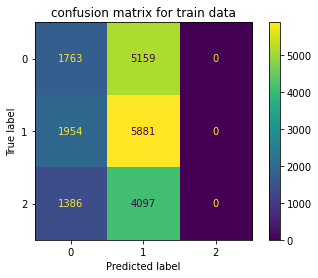

In [156]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(sentiment_train, predict_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for train data')

plt.show()

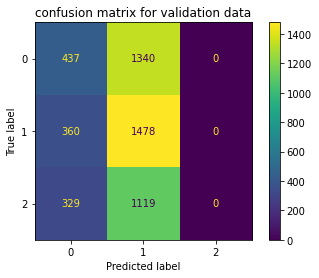

In [159]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(sentiment_dev, predict_val)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for validation data')

plt.show()


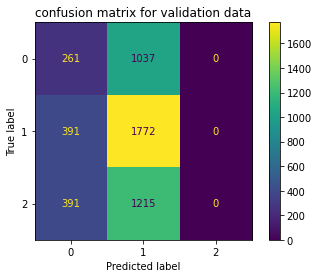

In [162]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(sentiment_test, predict_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['0', '1','2'])
cm_display.plot()
plt.title('confusion matrix for validation data')

plt.show()

overall the results are better in combined mode than each of the single models.